In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import compute_class_weight
from xgboost import XGBClassifier




In [2]:
attrition_df = pd.read_csv("HR-Employee-Attrition.csv")
attrition_df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# List the total number of columns in dataset.
attrition_df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Droping unnecessary columns : 'EmployeeCount' 'Over18' 'Education' 'StandardHours' 'StockOptionLevel' 
attrition_filtered_df = attrition_df.drop(columns=['EmployeeCount','Over18', 'Education', 'StandardHours', 'StockOptionLevel'])
attrition_filtered_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,2061,3,Male,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,2062,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2064,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,2065,4,Male,...,14,3,4,17,3,2,9,6,0,8


In [6]:
# Finding number of rows with Attrition values as 'NO' 
no_attrition_set= attrition_filtered_df[attrition_filtered_df['Attrition'] != 'Yes']
no_attrition_set


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,23,4,4,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,12,3,4,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,Life Sciences,8,4,Male,...,13,3,3,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Medical,10,3,Female,...,20,4,1,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,2061,3,Male,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,2062,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2064,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,2065,4,Male,...,14,3,4,17,3,2,9,6,0,8


In [7]:
# Finding the number of rows with attrition values as 'YES'
attrition_set= attrition_filtered_df[attrition_filtered_df['Attrition'] == 'Yes']
attrition_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,11,3,1,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,15,3,2,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Life Sciences,19,3,Male,...,14,3,2,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Life Sciences,27,3,Male,...,23,4,2,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Medical,31,2,Male,...,11,3,3,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,Marketing,2023,4,Male,...,19,3,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,Medical,2027,1,Male,...,14,3,2,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,Technical Degree,2032,4,Male,...,11,3,4,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,Life Sciences,2044,2,Male,...,12,3,4,12,3,3,6,3,0,1


In [8]:
# check for any missing values.
attrition_filtered_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

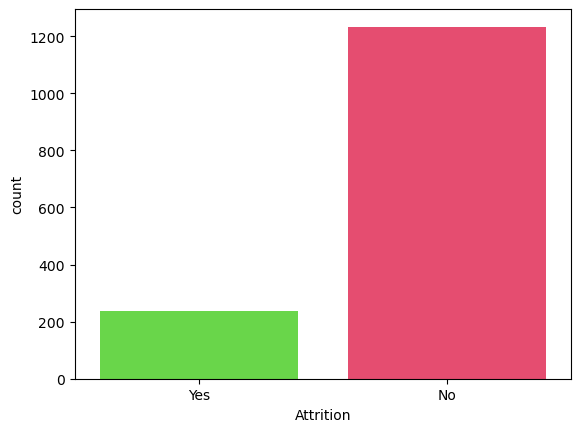

In [9]:
# Attrition vs Count  using countplot in bright color
# sns.countplot(x= 'Attrition', data= attrition_filtered_df)
sns.countplot(x= 'Attrition', data= attrition_filtered_df, palette='prism', alpha=0.8)


<AxesSubplot:xlabel='Age', ylabel='Density'>

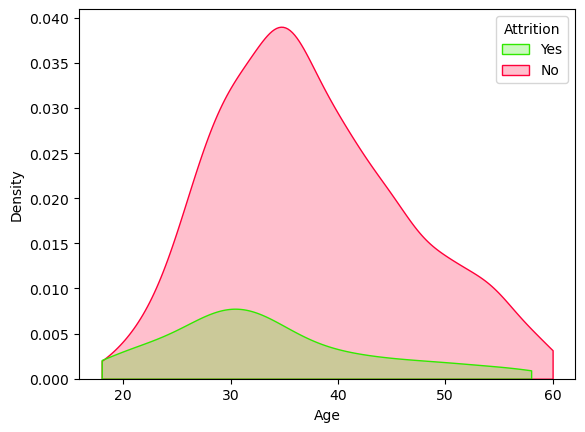

In [10]:
# Do Age plays major role in Attrition ? 
sns.kdeplot(data=attrition_filtered_df , x= 'Age', hue='Attrition', palette='prism', shade=True, cut=0)



<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

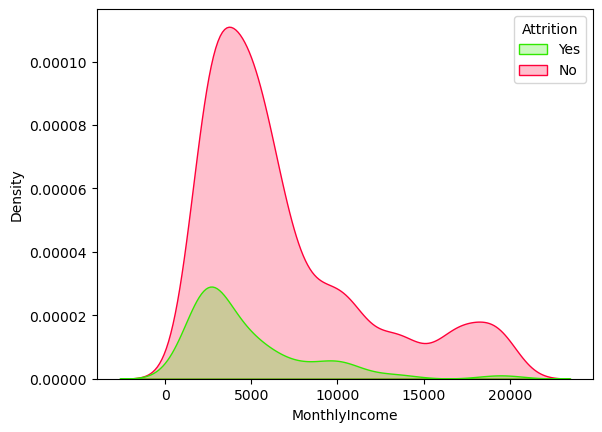

In [11]:
# Monthly Income vs Attrition density.
sns.kdeplot(data=attrition_filtered_df , x= 'MonthlyIncome', hue='Attrition', palette='prism', shade=True)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

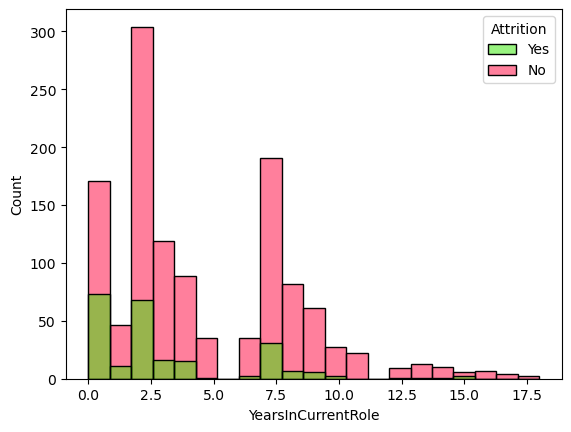

In [39]:
# Does experience helps people say longer in the company ?
sns.histplot(data= attrition_filtered_df, x='YearsInCurrentRole', hue='Attrition', palette='prism')


<AxesSubplot:xlabel='Gender', ylabel='Count'>

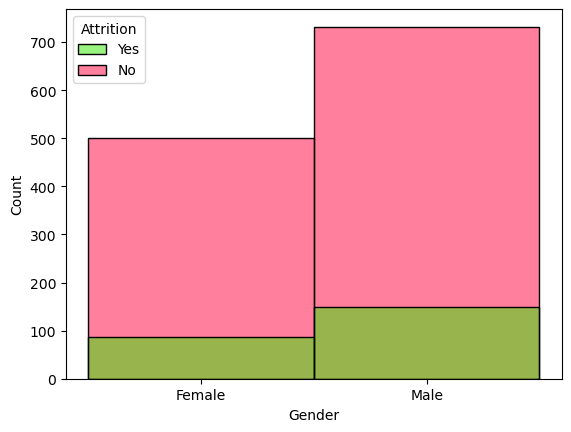

In [40]:
# Gender vs Attrition count
sns.histplot(data= attrition_filtered_df , x= 'Gender', hue='Attrition', palette='prism')


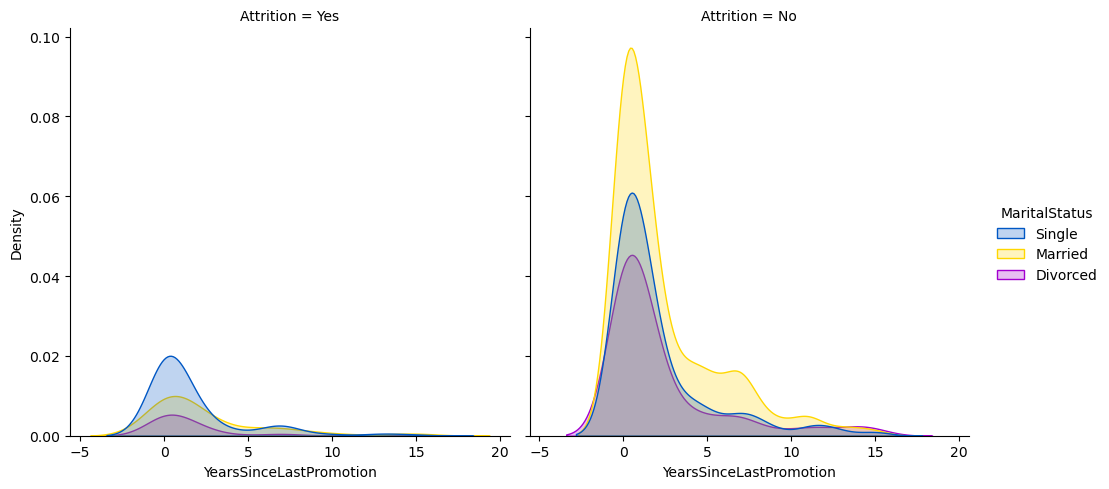

In [43]:
# Considering the Marital Status and Years since LastPromotion has any lead for employer leaving the company ?

#sns.displot(data= attrition_filtered_df, x= 'YearsSinceLastPromotion', hue='Attrition', col= 'Gender', kind='kde')
sns.displot(data= attrition_filtered_df, x= 'YearsSinceLastPromotion', hue='MaritalStatus', col= 'Attrition', kind='kde', palette='prism', fill=True)


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

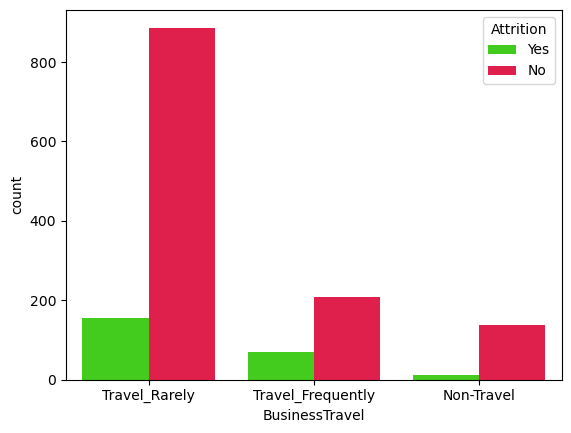

In [44]:
# Does Bussiness Travel has an impact Attrition ? 
sns.countplot(data= attrition_filtered_df, x='BusinessTravel', hue='Attrition', palette='prism')

In [16]:
# Finding columns with non-numerical values.
attrition_filtered_df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [17]:
#Convert object type Attributes to numeric type
attrition_df['Attrition'] = attrition_df['Attrition'].astype('category').cat.codes

#print
print(attrition_df.dtypes)



Age                          int64
Attrition                     int8
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

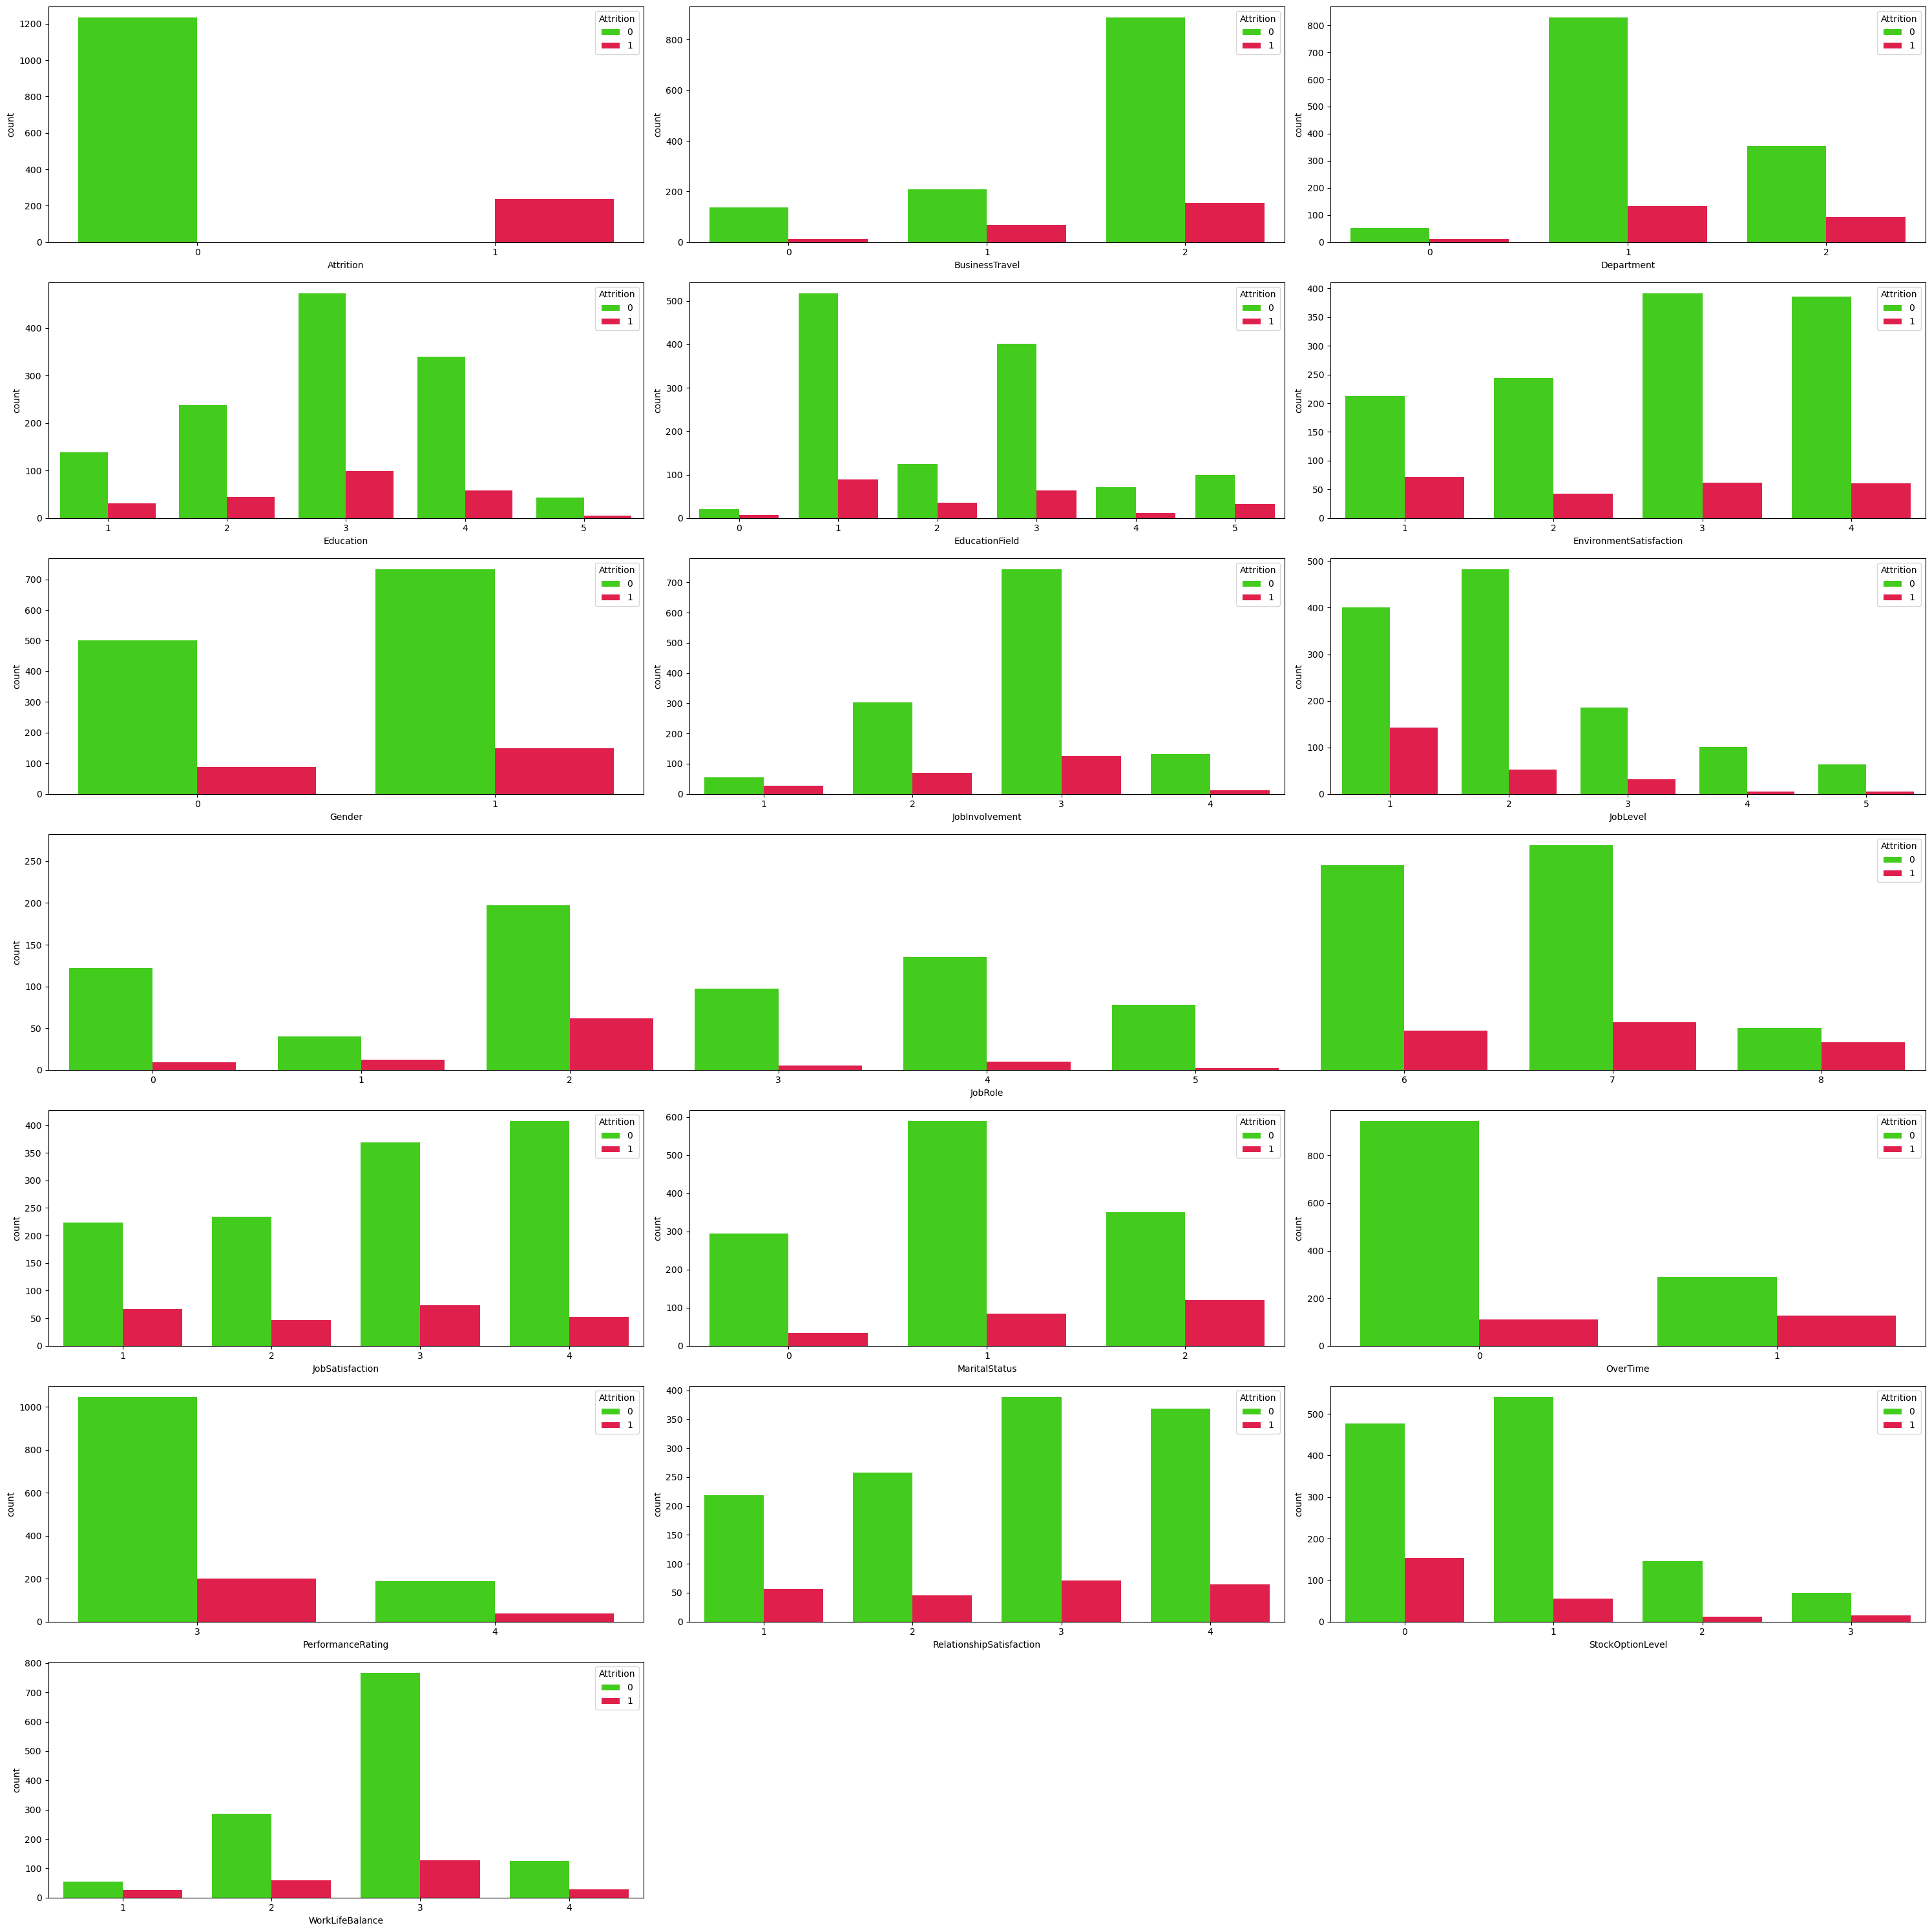

In [45]:

cl = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField',
             'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
             'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'WorkLifeBalance']
plt.figure(figsize=(30,30))
gridspec.GridSpec(7, 3)
locator1, locator2 = [0, 0]
for column in cl:
    if column == 'JobRole':
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        sns.countplot(x=column, hue='Attrition', data=attrition_df, palette='prism')
        locator1 += 1
        locator2 = 0
        continue
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(x=column, hue='Attrition', data=attrition_df, palette='prism')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.show()

In [19]:
#Categorical Columns
categorical=attrition_df.select_dtypes(include= ["object"])
categorical.columns
     

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [20]:

#label encoding
# Create a dictionary to store the mapping between categories and their numerical values for each attribute
mapp = {}
# Loop over each attribute and perform label encoding
for col in attrition_df.columns:
    if attrition_df[col].dtype == 'object':
        le = LabelEncoder()
        attrition_df[col] = le.fit_transform(attrition_df[col])
        mapp[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping for each attribute
print(mapp)

{'BusinessTravel': {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}, 'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}, 'EducationField': {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}, 'Gender': {'Female': 0, 'Male': 1}, 'JobRole': {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}, 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2}, 'Over18': {'Y': 0}, 'OverTime': {'No': 0, 'Yes': 1}}


In [21]:
# Define and drop
X = attrition_df.copy()
X.drop("Attrition", axis=1, inplace=True)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


Create the targe vector by assigning the values of the Default column from the attrition_df DataFrame

In [22]:
# Define target vector
y = attrition_df["Attrition"].values.reshape(-1, 1)
y[:5]


array([[1],
       [0],
       [1],
       [0],
       [0]], dtype=int8)

Split the data into training and testing sets

In [23]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

combine = X_train.copy()
combine['Survived'] = y_train
pos_df = combine[combine['Survived'] == 1]
neg_df = combine[combine['Survived'] == 0]
new_df = pd.concat([pos_df,pos_df, pos_df, pos_df, pos_df, neg_df])
new_df['Survived'].value_counts()


1    950
0    912
Name: Survived, dtype: int64

In [24]:
#turn new data into x train and y train
X_train = new_df.drop("Survived", axis=1)
y_train = new_df["Survived"]


Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [25]:
# Create the StandardScaler instance
scaler = StandardScaler()


In [26]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
     

In [27]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

Once the data is scaled, create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500` and `random_state=78`.

In [28]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [29]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

## Making Predictions Using the Random Forest Model

Validate the trained model by predicting attrition the testing data (`X_test_scaled`).

In [30]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [31]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,316,5
Actual 1,40,7


Accuracy Score : 0.8777173913043478
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       321
           1       0.58      0.15      0.24        47

    accuracy                           0.88       368
   macro avg       0.74      0.57      0.59       368
weighted avg       0.85      0.88      0.84       368



In [33]:
# Get the Attrition importance array
importances = rf_model.feature_importances_
# List the top 10 reasons for attrition
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.07259147840012953, 'MonthlyIncome'),
 (0.06281282248393291, 'Age'),
 (0.05883982914350733, 'YearsAtCompany'),
 (0.048927973044589596, 'OverTime'),
 (0.04863543958756794, 'DailyRate'),
 (0.04694608606888116, 'EmployeeNumber'),
 (0.045357167399273285, 'TotalWorkingYears'),
 (0.04452824650317367, 'MonthlyRate'),
 (0.04310674990613499, 'HourlyRate'),
 (0.039029505051227355, 'DistanceFromHome')]

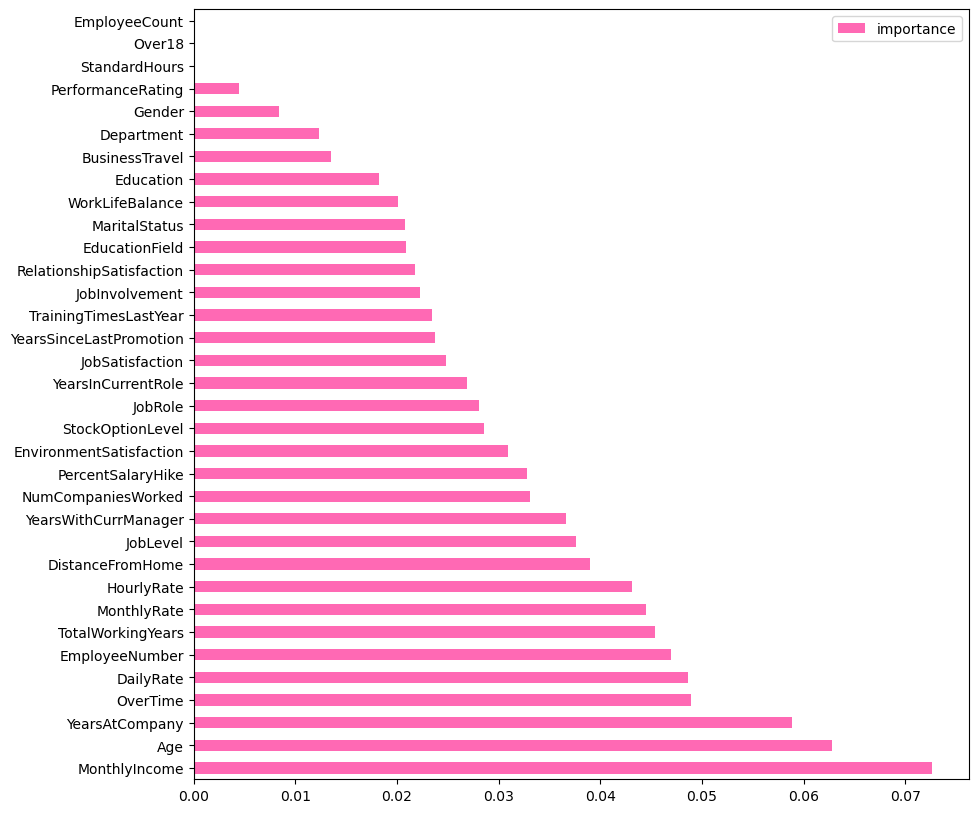

In [54]:
#List importances on a bar chart
importances = rf_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame(importances, index = features, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='barh', figsize=(10,10), color='hotpink')
plt.show()



## Create XGBoost Model

In [35]:
#Create a XGBoost model
params = {
  'colsample_bynode': 0.5,
  'learning_rate': 1,
  'max_depth': 10,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.8
}
bst = XGBClassifier( **params)
bst.fit(X_train_scaled, y_train.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.5,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=100,
              predictor=None, random_state=None, ...)

## Making Predictions Using the XGBoost Model

In [36]:
# Making predictions using the testing data for RF and XGBoost models
preds = bst.predict(X_test_scaled)

## Model Evaluation

In [37]:
# Calculating the confusion matrix for XGBoost model
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, preds)

In [38]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, preds))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,311,10
Actual 1,32,15


Accuracy Score : 0.8858695652173914
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       321
           1       0.60      0.32      0.42        47

    accuracy                           0.89       368
   macro avg       0.75      0.64      0.68       368
weighted avg       0.87      0.89      0.87       368

